In [1]:
# import required librabys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# open dataset
data =pd.read_csv("data.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# shape of dataset
data.shape

(32561, 15)

In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:xlabel='salary', ylabel='count'>

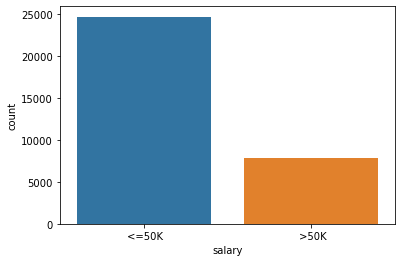

In [6]:
# visualizing the target values with respenct the count of category
import seaborn as sns
sns.countplot(data=data, x='salary')

we can see here that we have inbalnced data set 

In [7]:
# unique category and counts 
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 we have total 1836 null value( ? ) in workclass column 

In [8]:
data.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [9]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [10]:
data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [11]:
data["capital-gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [12]:
data.country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#we have total 583 null value in country column

In [13]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

#we have total 1843 null value in occupation column

In [14]:
# converting ? values as NAN(" ") value 
data['country'] = data['country'].replace(' ?',np.nan)
data['workclass'] = data['workclass'].replace(' ?',np.nan)
data['occupation'] = data['occupation'].replace(' ?',np.nan)

In [15]:
print (data.shape)

(32561, 15)


In [16]:
data.occupation.isnull().sum()

1843

# missing value

In [17]:

## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_null=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_null:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

workclass 0.0564  % missing values
occupation 0.0566  % missing values
country 0.0179  % missing values


In [18]:
salary_map={' <=50K':1,' >50K':0}
data['salary']=data['salary'].map(salary_map).astype(int)
# converting the values in binary formate , which indicatte that if salory is <-50k then its 1 and if its >50k then 0


In [19]:
    
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0



Since they are some missing values, we can delete the this null value rows

In [20]:
# droping null values
data.dropna(how='any',inplace=True)
#shape of dataset after droping null values
data.shape

(30162, 15)

In [21]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,13,2174,0,40,1
1,50,83311,13,0,0,13,1
2,38,215646,9,0,0,40,1
3,53,234721,7,0,0,40,1
4,28,338409,13,0,0,40,1


# Exploratory Data Analysis

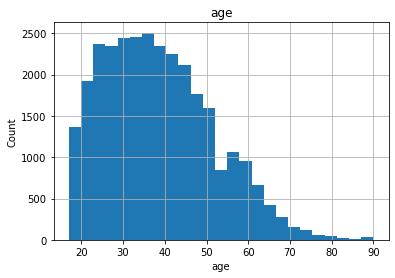

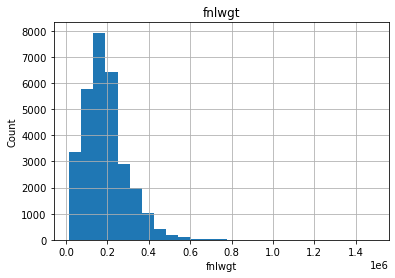

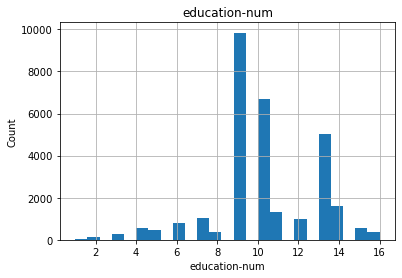

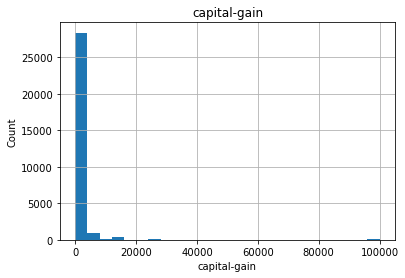

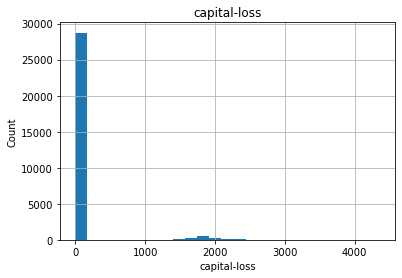

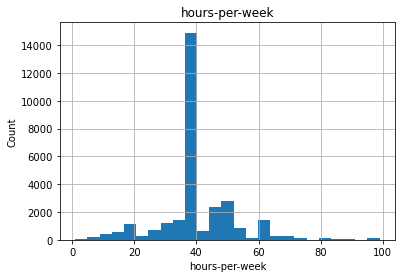

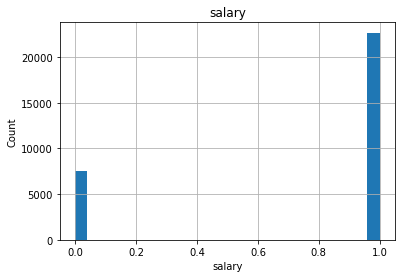

In [22]:
## Lets analyse the numerical values by creating histograms to understand the distribution

for feature in numerical_features:
    data1=data.copy()
    data1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

since there are some outlier in data so will do something with this (capital gain and capital loss) if there is no relationship with salary column then we will delete those columns.

In [23]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [24]:
# list of category in country feature
data.country.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

we can see here 27504 no of data from united-state and other data is form some other countrys so we can convert these in non-US and US

In [25]:
datasets = [data]

In [26]:
# here we are converting United-state as US and others as Non-US
for dataset in datasets:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [27]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Non-US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,US,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,US,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,US,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,US,1


In [28]:
data['country'] = data['country'].map({'US':1 , 'Non-US':0}).astype(int)
#assined binary values to country feature US =1 And Non-us =0

In [29]:
data['sex'] = data['sex'].map({' Male':1,' Female':0}).astype(int)
#assined binary values to sex feature Male =1 And female =0

In [30]:
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [31]:
data["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [32]:
#lets convert marital feature in couple and Single (binary)
data["marital-status"] = data["marital-status"].replace(
    [' Never-married',' Divorced',' Separated',' Married-spouse-absent',' Widowed'],'Single')

data['marital-status'] = data['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')



In [33]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Couple,Tech-support,Wife,White,0,0,0,38,1,1
32557,40,Private,154374,HS-grad,9,Couple,Machine-op-inspct,Husband,White,1,0,0,40,1,0
32558,58,Private,151910,HS-grad,9,Single,Adm-clerical,Unmarried,White,0,0,0,40,1,1
32559,22,Private,201490,HS-grad,9,Single,Adm-clerical,Own-child,White,1,0,0,20,1,1


In [34]:
data[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.545009
Single,0.931637


<AxesSubplot:xlabel='marital-status', ylabel='count'>

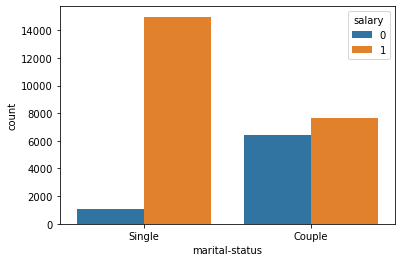

In [35]:
sns.countplot(data=data,x='marital-status',hue='salary')

In [36]:
data.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [37]:
data[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()
# comparing marital-status and realtionship with salary to check the relations

salary
marital-status relationship             
Couple          Husband         0.544331
                Not-in-family   0.714286
                Other-relative  0.857143
                Own-child       0.821429
                Wife            0.506401
Single          Not-in-family   0.893802
                Other-relative  0.976623
                Own-child       0.988818
                Unmarried       0.933686

In [38]:
data[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.544331
 Not-in-family  Couple          0.714286
                Single          0.893802
 Other-relative Couple          0.857143
                Single          0.976623
 Own-child      Couple          0.821429
                Single          0.988818
 Unmarried      Single          0.933686
 Wife           Couple          0.506401

from the above two table we can observe that relationship and marital-status both the feature are important.

In [39]:
relation_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}
data['relationship'] = data['relationship'].map(relation_map)    
data.head(10)
# assigned numerical values to the catogorys which are present in relationship column

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Couple,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Single,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Single,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,2,White,1,5178,0,40,1,0


In [40]:
data['marital-status'] = data['marital-status'].map({'Couple':0,'Single':1})
# assigned numerical values to the catogorys which are present in marital-status column   
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


In [41]:
data.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [42]:
def convert_workclass(x):
    if x['workclass'] == ' Fedral-gov' or x['workclass'] ==' Local-gov' or x['workclass'] ==' State-gov':
        return 'govt'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] ==' Self-emp-not-inc':
        return 'Self-Employed'
    elif x['workclass'] == ' Private':
        return 'Private'
    else:
        return 'Without-pay'
    
data['Emplyee-Type'] = data.apply(convert_workclass, axis=1)
data.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1,Self-Employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1,Private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1,Private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1,Private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1,Private
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1,Private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0,Self-Employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0,Private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0,Private


In [43]:
data[['Emplyee-Type','salary']].groupby(['Emplyee-Type']).mean()

,salary
Emplyee-Type,
Private,0.781208
Self-Employed,0.632242
Without-pay,0.618600
govt,0.715182


In [44]:
employment_map = {'govt':0,'Private':1,'Self-Employed':2,'Without-pay':3}
# assigned numerical values to the catogorys which are present in "Emplyee-Type" column
data['Emplyee-Type'] = data['Emplyee-Type'].map(employment_map)
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0,1


<AxesSubplot:xlabel='Emplyee-Type', ylabel='count'>

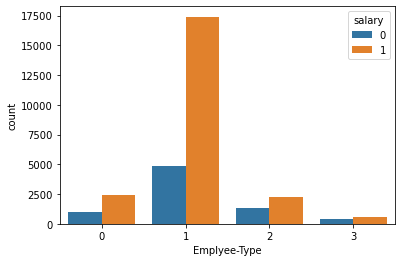

In [45]:
sns.countplot(data=data, x='Emplyee-Type', hue ='salary' )

In [46]:
data[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [47]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
#assigned numerical values to the catogorys which are present in "race" column

data['race']= data['race'].map(race_map)
    
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1


<AxesSubplot:xlabel='race', ylabel='count'>

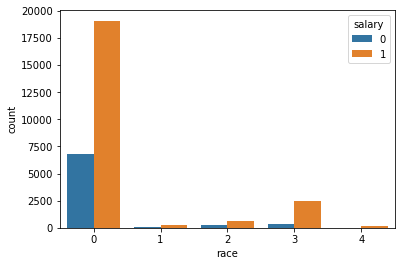

In [48]:
sns.countplot(data=data, x='race', hue ='salary' )

In [49]:
data[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


<AxesSubplot:xlabel='occupation', ylabel='count'>

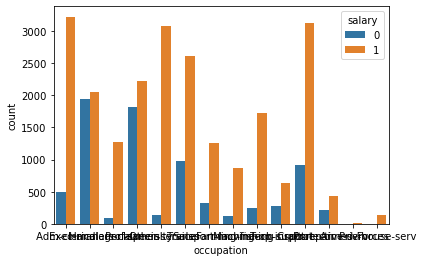

In [50]:
sns.countplot(data=data, x='occupation',hue='salary' )

In [51]:
data[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


<AxesSubplot:xlabel='education', ylabel='count'>

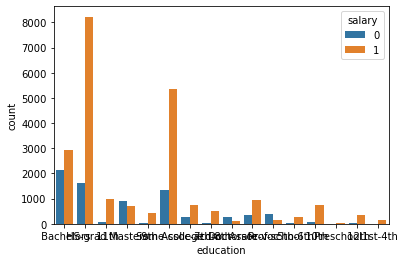

In [52]:
sns.countplot(data=data, x='education', hue='salary')

In [53]:
# no any relation with salary so we will drop non required columns
data.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
data.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,14084,0,50,1,0,1
9,42,159449,13,0,2,0,1,5178,0,40,1,0,1


In [54]:
data.shape

(30162, 13)

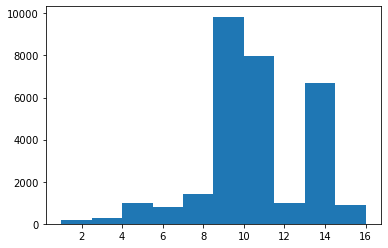

In [55]:
plt.hist(data['education-num'])
plt.show()

In [56]:
data['education-num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

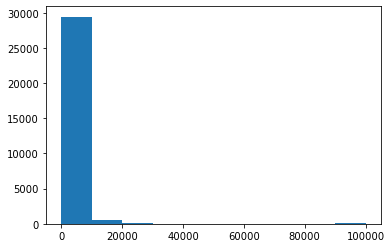

In [57]:
plt.hist(data['capital-gain'])
plt.show()

In [58]:
data['capital-gain'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
401          1
22040        1
4931         1
1455         1
1639         1
Name: capital-gain, Length: 118, dtype: int64

we have 27624 values as 0 so we can convert other values as 1 coz the are so less than 0 count

In [59]:
data.loc[(data['capital-gain'] > 0),'capital-gain'] = 1
data.loc[(data['capital-gain'] == 0 ,'capital-gain')]= 0

In [60]:
data.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


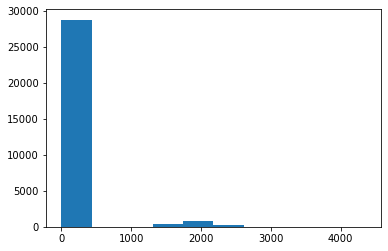

In [61]:
plt.hist(data['capital-loss'],bins=None)
plt.show()

In [62]:
data['capital-loss'].value_counts()

0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
419         1
1411        1
1539        1
2472        1
2467        1
Name: capital-loss, Length: 90, dtype: int64

In [63]:
data.loc[(data['capital-loss'] > 0),'capital-loss'] = 1
data.loc[(data['capital-loss'] == 0 ,'capital-loss')]= 0

In [64]:
data.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


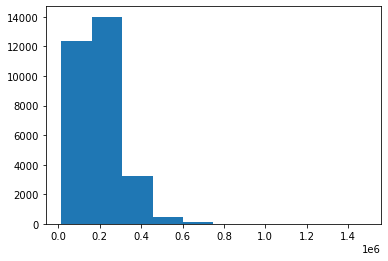

In [65]:
plt.hist(data['fnlwgt'],bins=None)
plt.show()

# Sepration of dependant and independant features

In [66]:
X= data.drop("salary", axis=1)
y = data["salary"]


# Train test split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 22)
print("size of train and test model")
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

size of train and test model
Train dataset: (21113, 12)(21113,)
Test dataset: (9049, 12)(9049,)


# Feature selection

<AxesSubplot:>

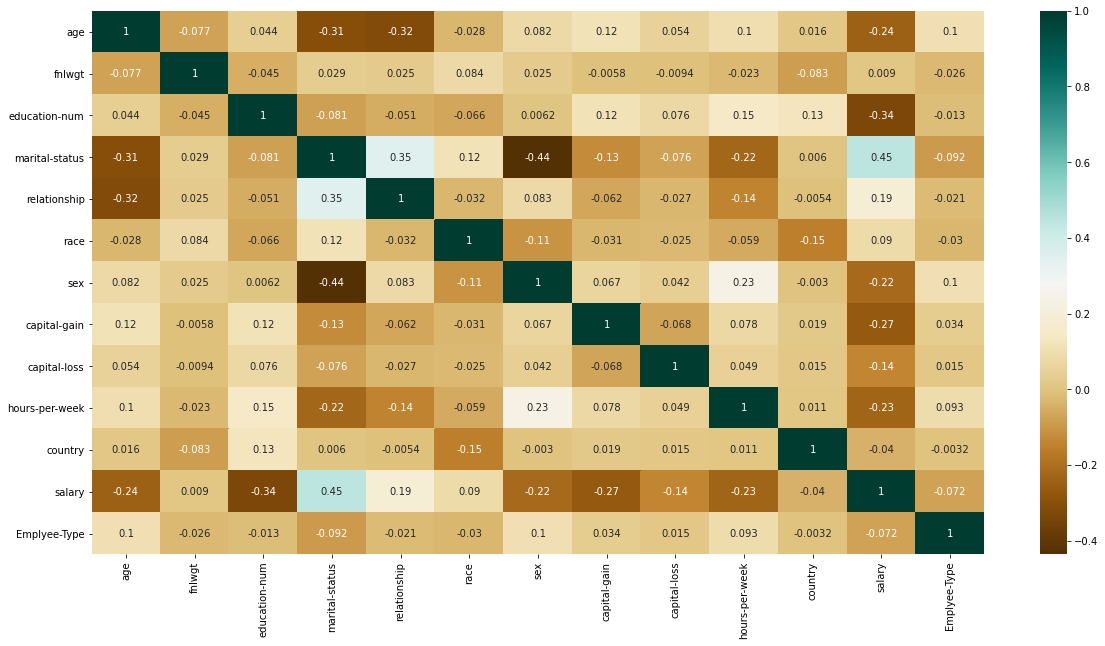

In [68]:
import seaborn as sns

plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c, cmap="BrBG", annot=True)

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)

[0.18049604 0.25353246 0.14190165 0.14865717 0.03081688 0.01283438
 0.01832077 0.05202421 0.01559191 0.10935635 0.00621169 0.03025651]


<AxesSubplot:>

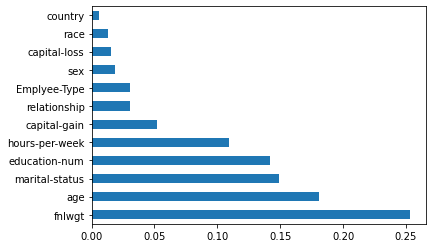

In [71]:
import pandas as pd
imp_feature = pd.Series(model.feature_importances_,index=X.columns)
imp_feature.nlargest(13).plot(kind='barh')

we can observ here ##fnlwgt having much imp than others and ##country having less imp than others - salary data

# model Training

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
names = ['LR','Random Forest','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

print(models)

[LogisticRegression(), RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), SVC()]


In [73]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [76]:
kfold = model_selection.KFold(n_splits=5)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_test)
    acc_score = accuracy_score(y_test,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.7521273068847386
----------------------------------------
Random Forest: 0.8214167311305116
----------------------------------------
GaussianNB: 0.7787600839871809
----------------------------------------
DecisionTreeClassifier: 0.7752237816333296
----------------------------------------
SVM: 0.7521273068847386


we got 82% of accouracy with Random Forest algorithom

In [77]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8207536744391646
----------------------------------------
Confusion Matrix:
[[1321  922]
 [ 700 6106]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2243
           1       0.87      0.90      0.88      6806

    accuracy                           0.82      9049
   macro avg       0.76      0.74      0.75      9049
weighted avg       0.82      0.82      0.82      9049



# lets apply Hyperparameter tunning

In [78]:


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [86]:
best_param = {'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [87]:
randomForest_with_hyper = RandomForestClassifier(n_estimators= 1400,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features='sqrt',
 max_depth=80,
 bootstrap=True)
randomForest_with_hyper.fit(X_train,y_train)
prediction_hyper = randomForest_with_hyper.predict(X_test)

In [88]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction_hyper))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction_hyper))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction_hyper))

----------------------------------------
Accuracy score:
0.8355619405459167
----------------------------------------
Confusion Matrix:
[[1310  933]
 [ 555 6251]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      2243
           1       0.87      0.92      0.89      6806

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049



# after hyper parameter we got 1% improvement in model.
# now model is giving 83% accuracy

In [91]:
# we had imbalcned dataset lets try to make it balanced and then we will try this model again to get more accuracy 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 15848
Before OverSampling, counts of label '0': 5265 

After OverSampling, the shape of train_X: (31696, 12)
After OverSampling, the shape of train_y: (31696,) 

After OverSampling, counts of label '1': 15848
After OverSampling, counts of label '0': 15848


In [92]:
randomForest_with_hyper2 = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features='sqrt',
 max_depth=80,
 bootstrap=True)
randomForest_with_hyper2.fit(X_train_res,y_train_res)
prediction_hyper2 = randomForest_with_hyper.predict(X_test)

In [93]:
print ('-'*40)
print ('Accuracy score after Smote:')
print (accuracy_score(y_test,prediction_hyper2))
print ('-'*40)
print ('Confusion Matrix after Smote:')
print (confusion_matrix(y_test,prediction_hyper2))
print ('-'*40)
print ('Classification Matrix after Smote:')
print (classification_report(y_test,prediction_hyper2))

----------------------------------------
Accuracy score after Smote:
0.8355619405459167
----------------------------------------
Confusion Matrix after Smote:
[[1310  933]
 [ 555 6251]]
----------------------------------------
Classification Matrix after Smote:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      2243
           1       0.87      0.92      0.89      6806

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.77      9049
weighted avg       0.83      0.84      0.83      9049



# no change in accuracy so now we will save our model

In [95]:
#Save model
import pickle
filename = 'randomForest_model.pkl'
pickle.dump(randomForest, open(filename, 'wb'))

In [107]:
#let's test the model
import joblib
mj = joblib.load('randomForest_model.pkl')

In [109]:
#predict the value
mj.predict([[39,77516,13,1,3,0,1,1,0,40,1,0]])

array([1])

In [100]:
data.head(15)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


In [111]:
pip freeze >reqirement.txt

Note: you may need to restart the kernel to use updated packages.


In [112]:
data.describe()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,Emplyee-Type
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,0.532989,2.381109,0.379650,0.675685,0.084146,0.047311,40.931238,0.911876,0.751078,1.070983
std,13.134665,1.056530e+05,2.549995,0.498919,1.200446,0.973227,0.468126,0.277611,0.212307,11.979984,0.283480,0.432396,0.592691
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
50%,37.000000,1.784250e+05,10.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
75%,47.000000,2.376285e+05,13.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000
max,90.000000,1.484705e+06,16.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,3.000000
